## Linear Regression from Scratch

[https://youtu.be/ltXSoduiVwY?si=HTx7HEjB4c88mY-C](https://youtu.be/ltXSoduiVwY?si=HTx7HEjB4c88mY-C)

In [1]:
import numpy as np

In [3]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

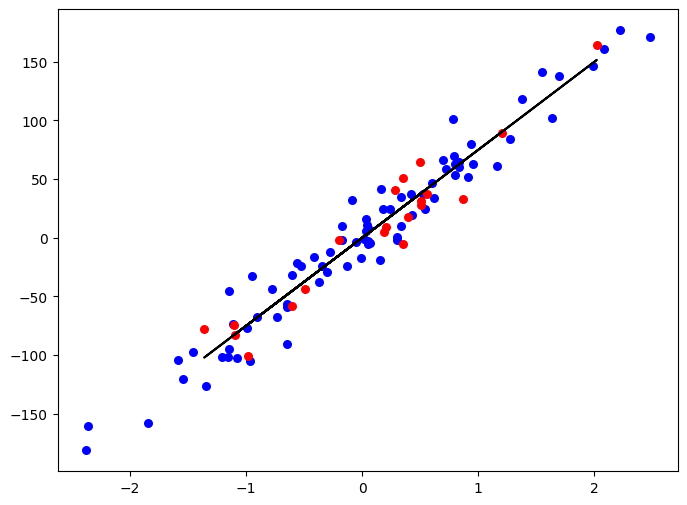

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X , y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = LinearRegression(learning_rate=0.01, n_iterations=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="b", s=30)
plt.scatter(X_test, y_test, color="r", s=30)
plt.plot(X_test, predictions, color="k")
plt.show()



In [6]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_value = mse(y_test, predictions)
print("MSE:", mse_value)

MSE: 305.7719958301902


In [8]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

r2_value = r2_score(y_test, predictions)
print("R2:", r2_value)

R2: 0.9247520464311005


In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_value = rmse(y_test, predictions)
print("RMSE:", rmse_value)

RMSE: 17.486337404676547


In [11]:
def adjusted_r2(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))  

adjusted_r2_value = adjusted_r2(y_test, predictions, X_test.shape[0], X_test.shape[1])
print("Adjusted R2:", adjusted_r2_value)

Adjusted R2: 0.9205716045661617


•	sklearn.datasets: Contains make_regression which is used to generate synthetic regression data.

•	sklearn.model_selection: Includes train_test_split to split data into training and testing sets.

•	make_regression generates a dataset for regression analysis. Here, 100 samples with 1 feature and added noise of 20 units are created. random_state ensures reproducibility.

•	The data is then split into training and testing sets, with 20% of the data reserved for testing. The random_state parameter ensures that the split is reproducible.

•	The LinearRegression class encapsulates the model. It initializes with a learning_rate and number of n_iterations for the gradient descent.

•	fit method calculates the optimal values for weights and bias using gradient descent. dw and db are the gradients of the loss function with respect to the weights and bias, respectively.

•	predict method computes the predicted values using the learned weights and bias.

•	An instance of LinearRegression is created and trained on the training data using the fit method.

•	Predictions are made on the test data.

•	The results are visualized by plotting the training data (blue), test data (red), and the regression line (black).

•	mse function computes the Mean Squared Error, a measure of the average of the squares of the errors.

•	r2_score function computes the R-squared, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).